# Applied Machine Learning with Scikit Learn

*Adapted from https://github.com/justmarkham*

### Libraries

- [scikit-learn](http://scikit-learn.org/stable/)
- pandas
- matplotlib

In this tutorial we will see some basic examples of Linear Regression for regression and Logistic Regression for classification.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline

# Regression with Linear Regression

|     *            | continuous     | categorical    |
| ---------------- | -------------- | -------------- |
| **supervised**   | **regression** | classification |
| **unsupervised** | dim. reduction | clustering     |

### Motivation

Why are we learning Linear Regression?
- widely used
- runs fast
- easy to use (not a lot of tuning required)
- (in some cases) highly interpretable
- basis for many other methods


Let's import the dataset:

In [2]:
data = pd.read_csv('data/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of units)

In [3]:
data.shape

(200, 4)

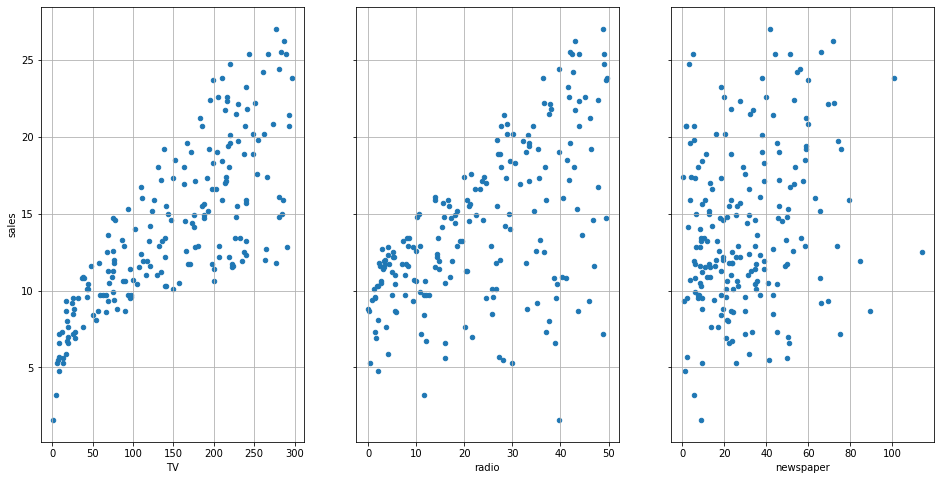

In [4]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8), grid=True)
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1], grid=True)
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2], grid=True)

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="img/estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction:

<img src="img/slope_intercept.png">

## Hands on!
Let's create the feature matrix and the class vector (X and y):

In [5]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

X.describe()

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


**Scikit-learn** provides an easy way to train the model:

In [6]:
lin_reg = LinearRegression()  # create the model
lin_reg.fit(X, y)  # train it

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Back to the theory! Let's see what the formula looks like:

In [7]:
for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(lin_reg.coef_[f], feature_cols[f]))
print(lin_reg.intercept_)

0.045764645455397615 * TV + 
0.18853001691820456 * radio + 
-0.0010374930424763272 * newspaper + 
2.9388893694594085




$$y = \beta_0 + \beta_1  \times TV + \beta_2  \times radio + \beta_3  \times newspaper$$
$$y = 2.938 + 0.045 \times TV + 0.18  \times radio + -0.001  \times newspaper$$

Let's plot the predictions and the original values:

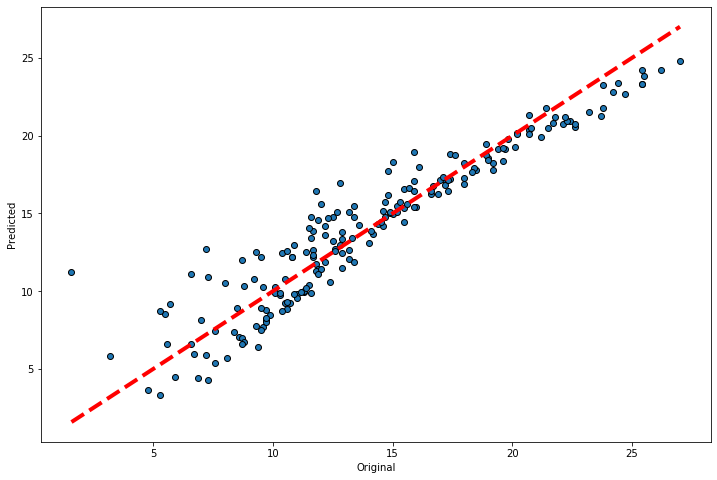

In [8]:
lr = LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

In [10]:
predicted.shape

(200,)

In [11]:
mean_squared_error(y, predicted)

3.0729465971002106

## Regularization

In our dataset, we have only 3 features, but 200 records, which is enough for learning a good linear model. But what if we had much fewer records, say, 5?

In [12]:
X = X[:5]
y = y[:5]

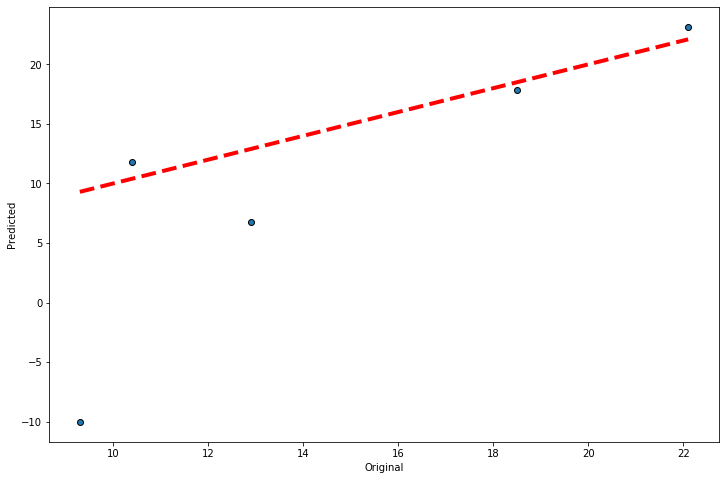

In [13]:
lr = LinearRegression()

predicted = cross_val_predict(lr, X, y, cv=5)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

In [14]:
mean_squared_error(y, predicted)

82.77419262404129

In [15]:
logistic = LinearRegression()
logistic.fit(X, y)
predicted_train = logistic.predict(X)
mean_squared_error(y, predicted_train)

0.056364283141270156

**Problem**: The model remembers the training records (overfitting).

**Solution**: Regularization

Regularization refers to methods that help to reduce overfitting. Let's try Ridge Regression, which puts a penalty on large weights $\beta_i$ and forces them to be smaller in magnitude. This reduces the complexity of the model. More on this in the homework.

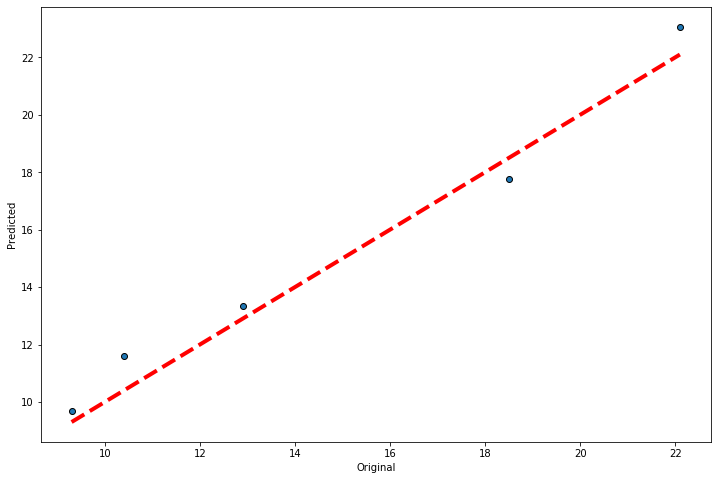

In [16]:
ridge = Ridge(alpha=6)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted_r = cross_val_predict(ridge, X, y, cv=5)

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(y, predicted_r, edgecolors=(0, 0, 0))
ax.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=4)
ax.set_xlabel('Original')
ax.set_ylabel('Predicted')
plt.show()

In [17]:
mean_squared_error(y, predicted_r)

0.6442462580572467

# Classification with Logistic Regression

|*|continuous|categorical|
|---|---|---|
|**supervised**|regression|**classification**|
|**unsupervised**|dim. reduction|clustering|

Let's import the dataset:

In [ ]:
titanic_raw = pd.read_excel('data/titanic.xls')
titanic = titanic_raw.dropna(axis=0, how='any')
titanic.head()

What are the **features**?
- sex
- age
- fare: ticket price

What is the **response**?
- survived: whether the passenger survived the disaster or not

In [ ]:
dead = titanic[titanic['survived']==0]
survived = titanic[titanic['survived']==1]

print("Survived {0}, Dead {1}".format(len(dead), len(survived)))

Specify the columns to use as features:

In [ ]:
titanic_features = ['sex', 'age', 'fare']

### Let's prepare the feature vector for the training

The dataset contains one categorical variable: sex (male|female)

We need to convert it to a numerical variable. Pandas offers the method *get_dummies* that takes care of this:

In [ ]:
# The features vector
X = pd.get_dummies(titanic[titanic_features])
X.head()
# titanic['pclass'] = titanic['pclass'].astype('category')

The label used for the traning:

In [ ]:
y = titanic['survived']

Let's train the model ...

In [ ]:
logistic = LogisticRegression(solver='lbfgs')

# for f in range(len(feature_cols)):
#     print("{0} * {1} + ".format(logistic.coef_[f], feature_cols[f]))
print(logistic)

... and evaluate the precison/recall with a cross validation (10 splits).

In [ ]:
precision = cross_val_score(logistic, X, y, cv=10, scoring="precision")
recall = cross_val_score(logistic, X, y, cv=10, scoring="recall")

# Precision: avoid false positives
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
# Recall: avoid false negatives
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))

### Explore the model output

Let's train on the full dataset:

In [ ]:
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(X, y)

Of course, since we trained the whole dataset, we don't have new samples to predict, but we can predict the outcome and the relative probability for some artificial samples. Would you have survived?

In [ ]:
X.columns

In [ ]:
logistic.predict([[25, 100, 0, 1]])

In [ ]:
logistic.predict_proba([[25, 100, 0, 1]])

In [ ]:
logistic.predict([[25, 100, 1, 0]])

In [ ]:
logistic.predict_proba([[25, 100, 1, 0]])